In [47]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve

In [120]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/Pokemon/'
filename01 = 'Pokemon721.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
df_full.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

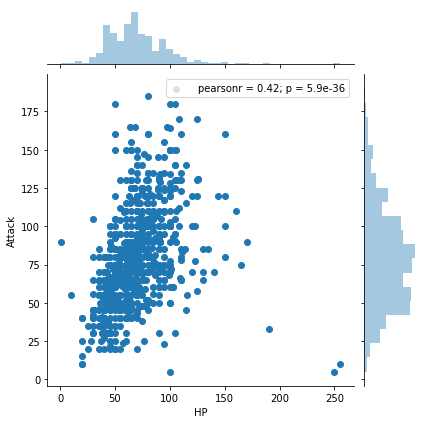

In [6]:
sns.jointplot(x="HP", y="Attack", data=df_full)
plt.show()

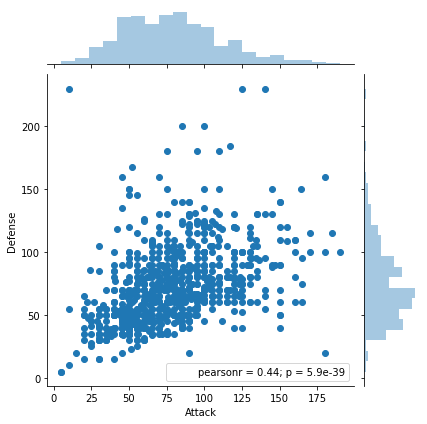

In [7]:
sns.jointplot(x="Attack", y="Defense", data=df_full)
plt.show()

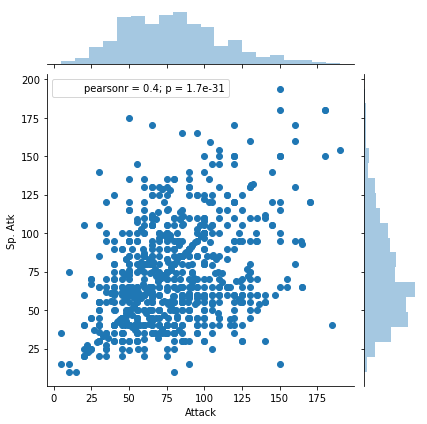

In [8]:
sns.jointplot(x="Attack", y="Sp. Atk", data=df_full)
plt.show()

In [12]:
#創造純數字的欄位
num_cols = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
df_num = df_full[num_cols]

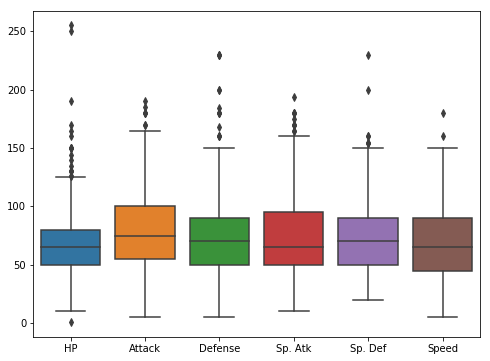

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_num)
plt.show()

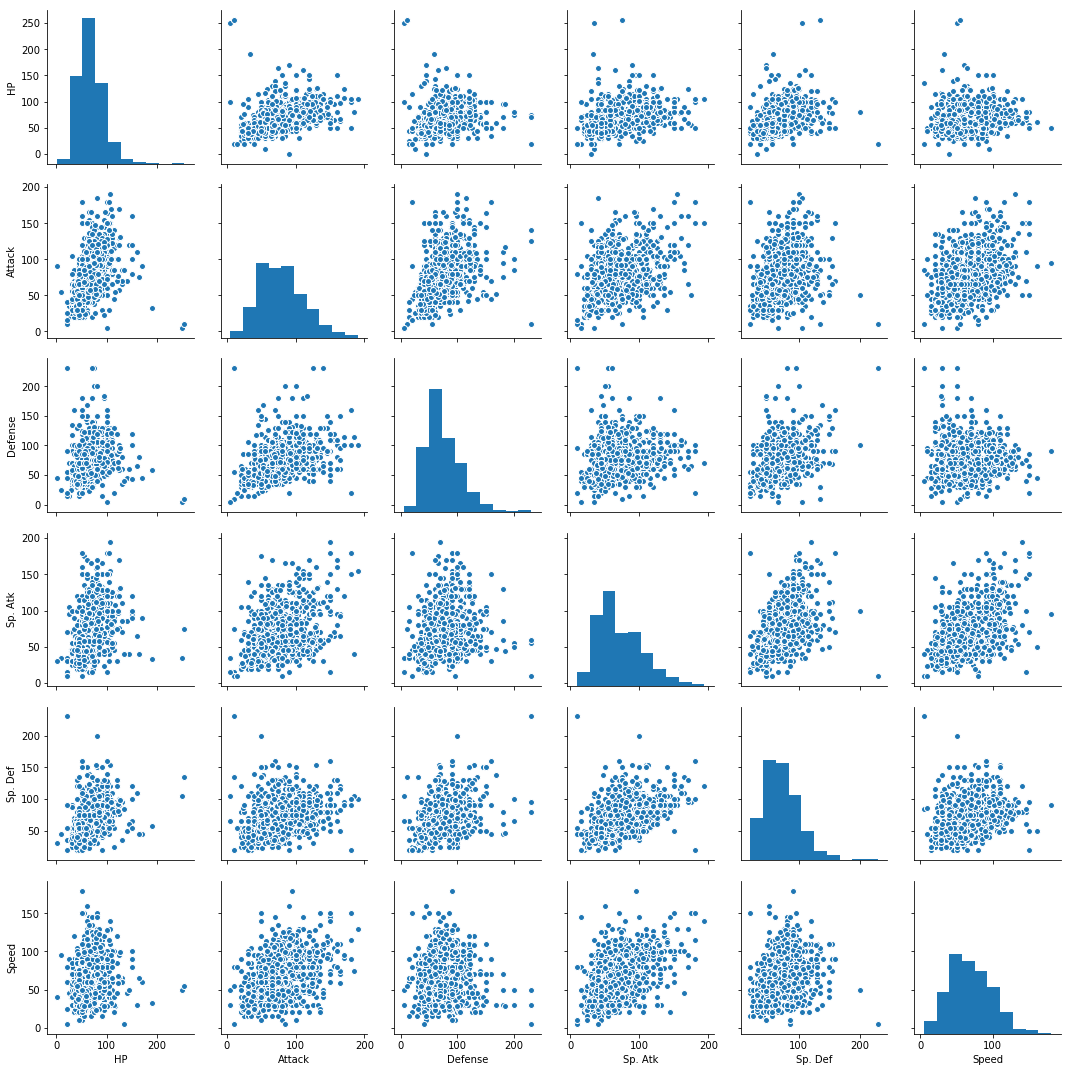

In [13]:
sns.pairplot(df_num)
plt.show()

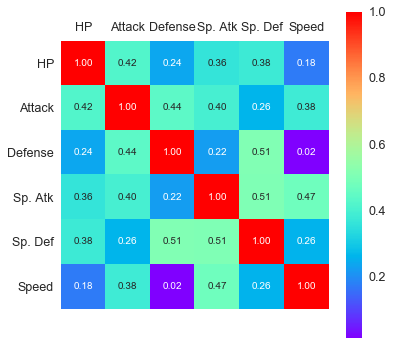

In [125]:
plt.figure(figsize=(6,6)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(df_num.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 cmap='rainbow')
hm.xaxis.set_ticks_position('top')
plt.show()

In [36]:
pkmn = pd.melt(df_full, id_vars=["Name", "Type 1", "Type 2"], value_vars=num_cols)
pkmn.head()

,Name,Type 1,Type 2,variable,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


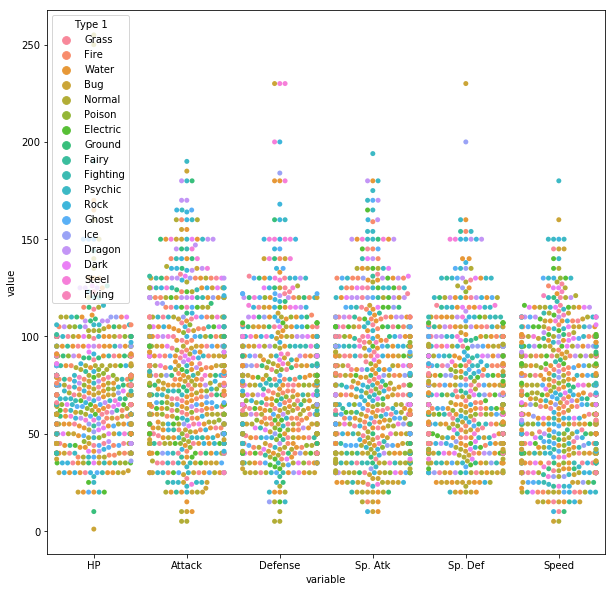

In [38]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='variable', y="value", data=pkmn, hue="Type 1");
plt.show()

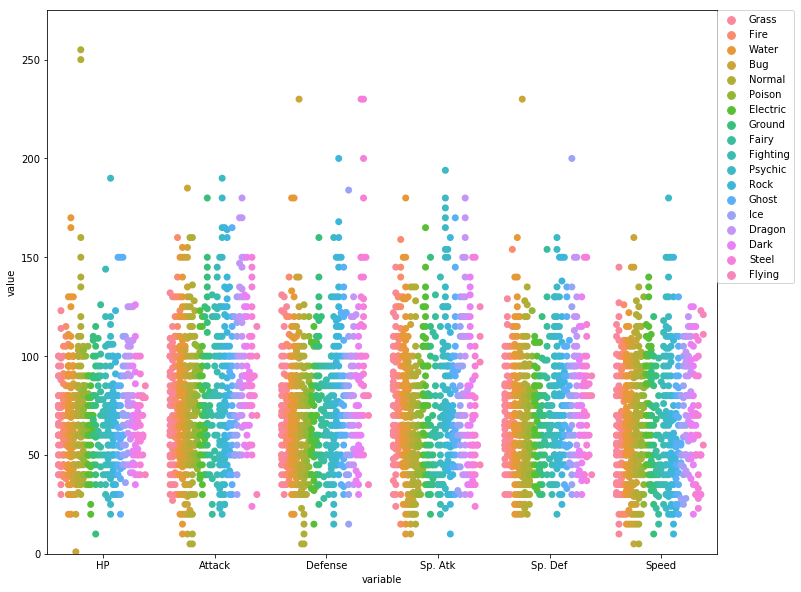

In [41]:
plt.figure(figsize=(12,10))
plt.ylim(0, 275)
sns.swarmplot(x='variable', y="value", data=pkmn, hue="Type 1", dodge=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);
plt.show()

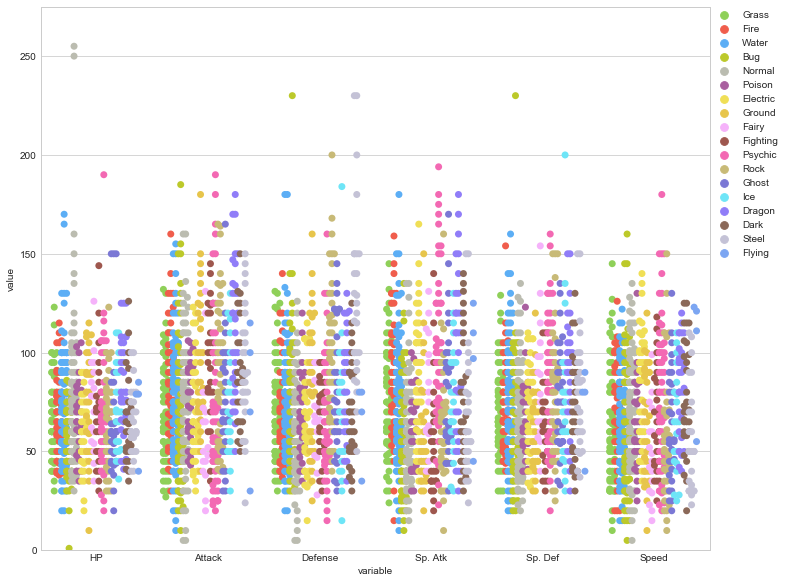

In [46]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    sns.swarmplot(x="variable", y="value", data=pkmn, hue="Type 1", dodge=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);
    plt.show()

# PCA

In [48]:
scaler = StandardScaler().fit(df_num)
df_scaled = scaler.transform(df_num)

print(df_scaled[:,0].mean())  # zero (or very close)
print(df_scaled[:,0].std())  # 1 (or very close)

-2.48689957516e-16
1.0


In [50]:
pca = PCA(n_components=0.8)  # consider enough components to explain 80% of the variance
pca.fit(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [52]:
pcscores.head()

,PC1,PC2,PC3,PC4
0,-1.556375,-0.021482,0.666504,0.184176
1,-0.362867,-0.050269,0.667913,0.269254
2,1.280152,-0.062720,0.623914,0.331391
3,2.620916,0.704263,0.995538,-0.199321
4,-1.758284,-0.706179,0.411454,-0.268602


In [55]:
pca.components_ #PCA對每個column variable解釋的程度

array([[ 0.38988584,  0.43925373,  0.36374733,  0.45716229,  0.4485704 ,
         0.33544048],
       [ 0.08483455, -0.01182493,  0.62878867, -0.30541446,  0.2390967 ,
        -0.66846305],
       [-0.47192614, -0.59415339,  0.06933913,  0.30561186,  0.56559403,
         0.07851327],
       [ 0.71769131, -0.4058359 , -0.41923734,  0.14751659,  0.18544475,
        -0.29716251]])

In [53]:
# num_cols = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
loadings = pd.DataFrame(pca.components_, columns=num_cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [54]:
loadings

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
PC2,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
PC3,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
PC4,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163


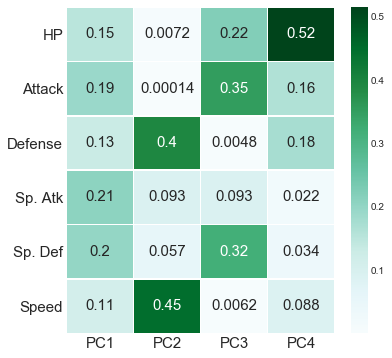

In [72]:
plt.figure(figsize=(6,6))

load_sqr = loadings**2
ax = sns.heatmap(load_sqr.T, linewidths=0.5, cmap="BuGn", annot=True, annot_kws={"size": 15})
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=15)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.show()

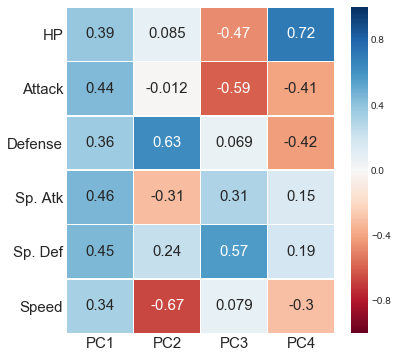

In [71]:
plt.figure(figsize=(6,6))

ax = sns.heatmap(loadings.T, center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True, annot_kws={"size": 15})
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=15)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.show()

In [77]:
best = pcscores.sort_values(by='PC4', ascending=False)[:5] #PC4最大的剛好HP也都高
df_full.loc[best.index]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False


In [75]:
df_full.sort_values(by='HP', ascending=False)[:5] #結果是一樣的

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


# 目標：使用原始資料，預測誰是Legendary

In [121]:
dict_legend = {True:1, False:0}  #他給的是bool，所以不能寫成str喔！！
df_full['Legendary'] = df_full['Legendary'].map(dict_legend)

df_full.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [88]:
cols = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def','Speed','Legendary']
df_fl = df_full[cols]

In [89]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_fl, random_state=42)

df_label = shuffle_df['Legendary']
df_feature = shuffle_df.drop('Legendary', axis=1)

cut_point = round(len(df_fl)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

### Scikit-Learn

In [90]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

Traing Score:0.979167
Testing Score:0.928125


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [91]:
from sklearn import datasets,cross_validation,tree

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label)) #over-training

Traing Score:0.987500
Testing Score:0.903125


In [92]:
from sklearn import datasets,cross_validation,svm

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = svm.SVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label)) #over-training

Traing Score:0.981250
Testing Score:0.906250


### Keras: MLP 

In [93]:
# Standardize
scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               1400      
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 41,801
Trainable params: 41,801
Non-trainable params: 0
_________________________________________________________________
None
Train on 95 samples, validate on 385 samples
Epoch 1/200
0s - loss: 0.6950 - acc: 0.1684 - val_loss: 0.6909 - val_acc: 0.9247
Epoch 2

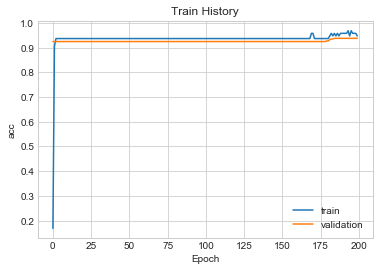

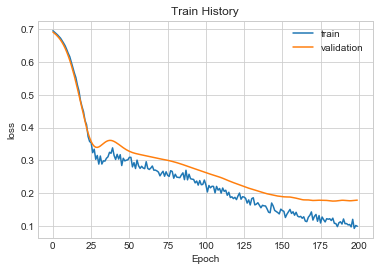

 32/320 [==>...........................] - ETA: 0s

accuracy= 0.90625


In [98]:
# Keras MLP models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
model.add(Dense(units=200, 
                input_dim=6, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=200, 
                          batch_size=2000, verbose=2) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

# 使用PCA(80%)，預測誰是Legendary：結果反而提高了ML的成績！！

In [112]:
from sklearn.utils import shuffle

df_PCA = pcscores
df_PCA['Legendary'] = df_full['Legendary']

shuffle_df = shuffle(df_PCA, random_state=42)

df_label = shuffle_df['Legendary']
df_feature = shuffle_df.drop('Legendary', axis=1)

cut_point = round(len(df_PCA)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

In [114]:
df_PCA.head()

,PC1,PC2,PC3,PC4,Legendary
0,-1.556375,-0.021482,0.666504,0.184176,0
1,-0.362867,-0.050269,0.667913,0.269254,0
2,1.280152,-0.062720,0.623914,0.331391,0
3,2.620916,0.704263,0.995538,-0.199321,0
4,-1.758284,-0.706179,0.411454,-0.268602,0


### Scikit-Learn

In [115]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

Traing Score:0.991667
Testing Score:0.943750


In [116]:
from sklearn import datasets,cross_validation,tree

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label)) #over-training

Traing Score:0.989583
Testing Score:0.934375


In [117]:
from sklearn import datasets,cross_validation,svm

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf = svm.SVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label)) #over-training

Traing Score:0.954167
Testing Score:0.931250


### Keras: MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 200)               1000      
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 201       
Total params: 41,401
Trainable params: 41,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 95 samples, validate on 385 samples
Epoch 1/120
0s - loss: 0.6965 - acc: 0.2421 - val_loss: 0.6897 - val_acc: 0.9247
Epoch 2

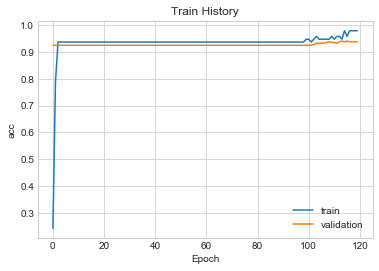

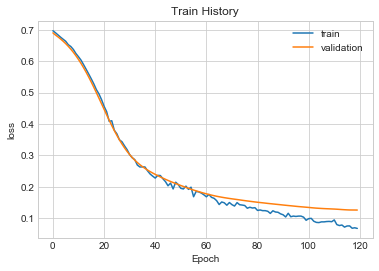

 32/320 [==>...........................] - ETA: 0s

accuracy= 0.9125


In [119]:
# Keras MLP models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
model.add(Dense(units=200, 
                input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='binary_crossentropy',   #二元用binary
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=120, 
                          batch_size=2000, verbose=2) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature, test_label)
print('\n')
print('accuracy=',scores[1])